## Homework 1

## Amol Dattatray Sangar

### P1: MLE for uniform distribution [4 points]

<div class="alert alert-info">
    
1. You took a class taught by Prof. K and found that only five students got an A+. You asked around and found their total scores which are as follows:
                    [92, 95.8, 91.3, 94.1, 90.9]

    You know that the pdf of a uniform distribution can be defined as follow:

    p(x) =  1/b−a if a ≤ x ≤ b
    
    p(x) =  0 otherwise


2. You assume that there must be an underlying uniform distribution for the A+ student group(which you don’t belong to unfortunately). Estimate the parameters b and a that maximize the likelihood of observing the five data samples you collected. Explain how you get your solution (Hint: you can solve this problem without writing up a program).


3. Now that you are obsessed with someone else’ grades, you became to wonder what would be the actual boundary Prof. K used, because you feel that you were so close to get an A+. You have a feeling that he must have used some reasonable numbers, such as an integer multiple of 5 rather than a real-valued boundary. For example, the actual a and b values must have been, say, “from 70 to 85 get an A-”, rather than “from 72.9 to 88.32 get an A-.” Based on this prior knowledge, adjust your a and b values for the A+ students. Justify your choice. You don’t need to formally prove this. Instead, you could use some other choices to explain why they are worse than your answer.
</div>

**Goal**: To find the parameters a and b that maximize the likelihood of observing the five sample points

The underlying uniform distribution and the PDF for the distribution can be represented as - 

$$\mathscr{L}(a,b) = \prod_{i=1}^{n}f(x_i;a,b)  = \prod_{i=1}^{n}\frac{1}{b-a} = \frac{1}{(b-a)^n}$$

We know that,
$$a <= min(X_1,X_2,.....X_n)$$ 
$$b >= max(X_1,X_2,.......X_n)$$

Taking log on both sides of the likelihood function,

$$\begin{aligned}
\log\mathscr{L}(a,b)&=\log\prod_{i=1}^{n}f(x_i;a,b)\\
&=\log\prod_{i=1}^{n}\frac{1}{b-a}\\ 
&=log((b-a)^{-n})\\
&= -n * log(b-a)
\end{aligned}$$

Partially derivating the function with respect to a and b,

$$\frac{\partial }{\partial a} log \mathscr{L}(a,b) = \frac{n}{b-a}$$
$$\frac{\partial }{\partial b} log \mathscr{L}(a,b) = -\frac{n}{b-a}$$
where n is the number of samples.

From above,
\begin{gather*}
N=5\\
\end{gather*}

It can be seen that the function is monotonically increasing for a whereas it is monotonically decreasing for b. Also, the distribution is bounded between 90.9 (lowest value) and 95.8 (highest value).

Therefore,
\begin{gather*}
\hat{a}_{MLE} = 90.9\\
\hat{b}_{MLE} = 95.8
\end{gather*}

Prof K gives A+ to students who have their grades between 90 and 100. This can be established because Prof K uses rounded values in integer multiples of 5 which implies the boundaries are set in the same way. 

**Lowest score for A+ is 90.9 (rounded to 90)**

**Highest score for A+ is 95.8 (rounded to 100)**

---

### P2: Central Limit Theorem [5 points]
<div class="alert alert-info">
    
1. Load the luddy.jpg file. It must be a 3655 × 6496 × 3 tensor, whose third dimension holds red, green and blue channels respectively. Let’s take the red channel, which will be a matrix of 3655 × 6496 elements.


2. Take two patches from two random locations in the image. You may want to use a fairly large patch size, such as 100 × 100. Get an average patch out of these two—each of the pixel intensities of the averaged patch is the average of the two pixels at the same position in the two original patches. See the histogram of the pixel intensities (I would use matplotlib’s hist function. It is a way to see the sample distribution of your data, which is with 10,000 samples (i.e., the number of pixels in the averaged patch) in our case. Does it look like a Gaussian distribution?


3. Now take 100 random patches and repeat the experiment. How does it look like? More Gaussian-like?


4. How about 1000 patches?


5. You know where we’re going. We’re talking about the central limit theorem. You must have built a feeling that some histogram is more Gaussian-looking than the others. Is there anyway to judge the level of Gaussianity in a more objective way? If you google about it, you’ll see some terms like kurtosis. For this homework, you’ll use the log-likelihood to measure the Gaussianity of the pixels in your three averaged patches (that are from 2, 100, and 1000 random patches, respectively).


6. The MLE solution for the Gaussian parameters, mean and variance, is simple: the sample mean and the sample variance. Calculate them from your three averaged patches. 


7. Now you have three pairs of Gaussian parameters (sample mean and variance) for the three averaged patches. For each averaged patch, calculate the log-likelihood of observing the 10,000 pixel intensities based . Use your MLE parameters. Compare the three log-likelihoods. Which one is with the highest log-likelihood value? What does this mean (in terms of the central limit theorem)?

</div>

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [2]:
# read image to array
im = np.array(Image.open('luddy.jpg'))

In [3]:
im.shape

(3655, 6496, 3)

In [4]:
red_channel = im[:, :, 0]
red_channel.shape

(3655, 6496)

In [5]:
def get_patch(no_of_patches):
    region = []
    for i in range(0,no_of_patches):
        x = random.randint(0, red_channel.shape[0] - 100)
        y = random.randint(0, red_channel.shape[1] - 100)

        image_crop_width = 100

        # box = (x,y,x+image_crop_width,y+image_crop_width)     # (left, upper, right, lower)
        # region.append(pil_im.crop(box))    # To crop image
        
        region.append(red_channel[x:x+image_crop_width,y:y+image_crop_width])
    
    return region

In [6]:
#least likelihood
def ll_norm(mu, sigma, data):
    n = len(data)
    ll = n*math.log(2*math.pi*(sigma**2))/2 + np.sum(((data-mu)**2)/(2 * (sigma**2))) - (0.5*np.log(2*np.pi) + np.log(sigma))
    return -ll

In [7]:
def calc_mean_std(patch_avg):
    rows = len(patch_avg)
    cols = len(patch_avg[0])
    n = rows*cols

    mean = np.mean(patch_avg)
    
    square = 0
    for r in range (rows):
        for c in range(cols):
            square += np.square(patch_avg[r][c] - mean)
    
    std = np.sqrt(square/n)
    
    return (mean, std)

### 2 random patches

In [8]:
# get 2 random patches from luddy.jpg image
patch_2 = get_patch(2)

In [9]:
patch_2[0].shape

(100, 100)

In [10]:
patch_2_avg = np.mean(patch_2, axis=0)

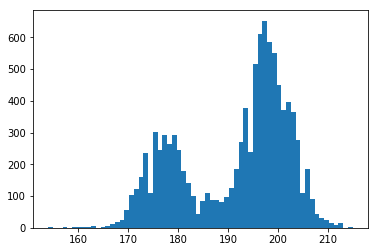

In [11]:
plt.hist(patch_2_avg.flatten(), 64)
plt.show()

In [12]:
mean_2,std_2 = calc_mean_std(patch_2_avg)
log_2 = ll_norm(mean_2,std_2,patch_2_avg)

In [13]:
print("Mean for averages of 2 patches is : ",mean_2)
print("Variance for average of 2 patches is : ",np.square(std_2))
print("Log Likelihood for average of 2 patches is : ",log_2)

Mean for averages of 2 patches is :  191.5342
Variance for average of 2 patches is :  114.1952803599993
Log Likelihood for average of 2 patches is :  -5325.501458229132


### 100 random patches

In [14]:
# get 100 random patches from luddy.jpg image
patch_100 = get_patch(100)

In [15]:
patch_100_avg = np.mean(patch_100, axis=0)

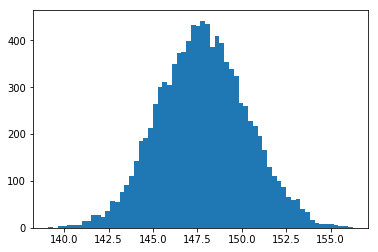

In [16]:
plt.hist(patch_100_avg.flatten(), 64)
plt.show()

In [17]:
mean_100,std_100 = calc_mean_std(patch_100_avg)
log_100 = ll_norm(mean_100,std_100,patch_100_avg)

In [18]:
print("Mean for averages of 100 patches is : ",mean_100)
print("Variance for average of 100 patches is : ",np.square(std_100))
print("Log Likelihood for average of 100 patches is : ",log_100)

Mean for averages of 100 patches is :  147.80105600000002
Variance for average of 100 patches is :  6.195531344864039
Log Likelihood for average of 100 patches is :  -5181.254414714399


### 1000 random patches

In [19]:
# get 1000 random patches from luddy.jpg image
patch_1000 = get_patch(1000)

In [20]:
patch_1000_avg = np.mean(patch_1000, axis=0)

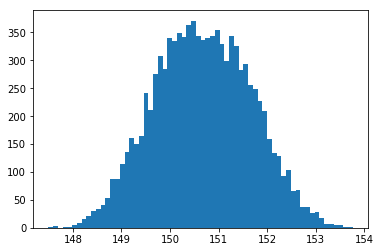

In [21]:
plt.hist(patch_1000_avg.flatten(), 64)
plt.show()

In [22]:
mean_1000,std_1000 = calc_mean_std(patch_1000_avg)
log_1000 = ll_norm(mean_1000,std_1000,patch_1000_avg)

In [23]:
print("Mean for averages of 1000 patches is : ",mean_1000)
print("Variance for average of 1000 patches is : ",np.square(std_1000))
print("Log Likelihood for average of 1000 patches is : ",log_1000)

Mean for averages of 1000 patches is :  150.6742594
Variance for average of 1000 patches is :  0.9825851473116362
Log Likelihood for average of 1000 patches is :  -5090.105285171644


### Observation: 
### The histogram looks more Gaussian with more no of random patches/samples. This can also be seen by the negative log likelihood values.  

---

### P3: Gradient Ascent for Eigendecomposition [6 points]

<div class="alert alert-info">
Implement expectation-maximization algorithm for Gaussian mixture models (see the EM algorithm below) in Python and call this program Gk. As you present your code explain your protocol for - 
    
<br>1. Although you learned power iteration as an optimzation tool for your eigendecomposition problem, this time I’d ask you to implement someting slightly different based on gradient descent (actually, gradient ascent).
    
<br>2. I prepared 1,000 randomly generated samples from a 2D Gaussian distribution (X.mat)1.

<br>3. Draw a scatter plot using matplotlib.pyplot.scatter to eyeball this football-shaped distribution. I ask you to find two eigenvectors from this sample distribution.
</div>

In [24]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
X = io.loadmat(os.path.join('./', 'X.mat'))

In [26]:
X.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [27]:
X = X['X']

In [28]:
X.shape

(2, 1000)

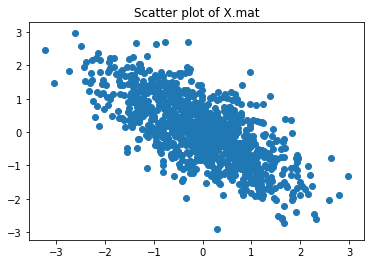

In [29]:
# SCATTER PLOT
plt.scatter(X[0], X[1])
plt.title('Scatter plot of X.mat')
plt.show()

<div class="alert alert-info">
    4. You know, power iteration first finds the eigenvector that’s associated with the largest eigenvalue. Let’s mimic the process. First off, since we do this using gradients, you need to initialize parameters of your model, i.e., the elements of the first eigenvector that you are looking for, w(1) ∈ R2, with random numbers. It should be a vector of two elements, as you have two dimensions in the original data space. Use random samples from a standard normal distribution to initialize them. 
</div>

In [30]:
# INITIALIZING W1 RANDOMLY
W1 = np.random.normal(size = (1,X.shape[0]))    # size = (1,2)
W1 = (W1[0])

<div class="alert alert-info">
    5. One condition you have to remember is that w(1) has to be a unit vector, meaning its L2-norm should be 1. Make sure that by normalizing it after initialization.
</div>

In [31]:
# NORMALIZING
W1 = W1 / np.sqrt((W1[0]**2 + W1[1]**2))
print(W1)

[-0.29163232  0.9565305 ]


In [44]:
# CHECK L-2 NORMALIZATION == 1
print(np.linalg.norm(W1))
print(np.sqrt(np.sum(W1**2)))

1.0
1.0


<div class="alert alert-info">

6. Project your data samples to your randomly-initialized-and-then-normalized eigenvector (meaning it’s not quite yet an eigenvector). Do it anyway. Let the resulting row vector be z = (w(1))⊤X.


7. You know, by definition, your eigenvalue is λ(1) = (w(1))⊤XX⊤w(1) = zz⊤. Since for now we are looking for the largest eigenvalue, we would like to maximize this value, which is our optimization goal.


8. Differentiate this objective function, λ(1), with respect to your parameters w(1). The derivative is the gradient direction. If you are not familiar with differentiating a linear algebra notation, revisit M01-C03-S05, where I gave you an example very similar to this case.


9. Using the gradient direction, update your parameter. Your learning rate should be a small number so that the update is gradual. Be careful with the sign of the gradient. This time, you are MAXIMIZING your objective function, rather than MINIMIZING it. So, the update algorithm is actually gradient ascent, not descent.


10. Another tricky part is the constraint that the eigenvector has to be a unit vector. There must be a different (better) way to enforce it, but for now let’s be handwavy: normalize the newly updated parameter vector w(1) to make sure its L2-norm is 1 like you did during the initialization process.


11. Repeat above process (P3.6-10) multiple times until the absolute values of your gradient updates are consistently too small.

</div>

In [33]:
def eigen_decomposition(X, w):
    alpha = 0.001
    i = 0
    max_iterations = 1000
    
    while i <= max_iterations:
        lambda_diff = 2 * np.dot(np.dot(X, X.T), w)    # 2 * (X * X.T) * w
        w = w + (alpha * lambda_diff)    # Update w using learning rate (alpha)
        w = w / np.sqrt(np.sum(w**2))    # L-2 NORMALIZATION
        i += 1
        
    return lambda_diff, w

In [34]:
eigen_value_1, W1 = eigen_decomposition(X, W1)

print('The first eigen value is: ' + str(eigen_value_1))
print('The first eigen vector is: ' + str(W1))

The first eigen value is: [-2341.70373615  2349.48603084]
The first eigen vector is: [-0.70593278  0.70827884]


In [35]:
largest_eigen_value = np.dot(X, X.T)
largest_eigen_value = np.dot(W1.T, largest_eigen_value)
largest_eigen_value = np.dot(largest_eigen_value, W1)

print('The largest eigen value is: ' + str(largest_eigen_value))

The largest eigen value is: 1658.5883302531922


In [36]:
# Calculating 's', 'u' and the contribution of the first eigen vector

def calc_su(w, X):
    s1 = np.sqrt(np.sum(np.dot(w.T,X)**2))
    u1 = np.dot(X.T, w)/s1
    contrib = np.dot(s1,u1.T)
    w, contrib = w.reshape(-1,1), contrib.reshape(-1,1)
    contrib = np.dot(w, contrib.T)
    return s1, u1, contrib

In [37]:
s1, u1, contrib = calc_su(W1, X)

In [38]:
# Removing the contribution of the first eigen vector from the original matrix

X_minus_EV = X - contrib
print(X_minus_EV.shape)

(2, 1000)


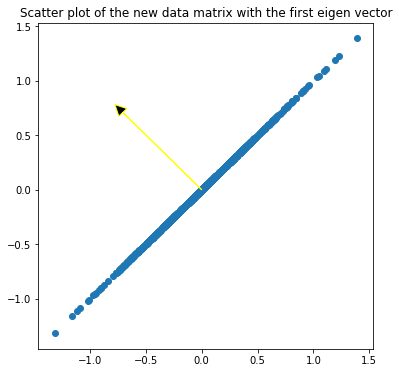

In [39]:
# Plotting the new data matrix along with the eigen vector

plt.figure(figsize = (6,6))
plt.scatter(X_minus_EV[0], X_minus_EV[1])
ax = plt.arrow(0,0,W1[0],W1[1],head_width = 0.1, head_length = 0.1,fc = 'black', ec= 'yellow')
plt.title('Scatter plot of the new data matrix with the first eigen vector')
plt.show()

<div class="alert alert-info">
    
12. Now let’s move on to the next eigenvector. Revisit M01-C02-S12 to remind yourself of the process of “taking of the effect of the first eigenvector (or equivalently the first singular vector).” Once you subtract the contribution of the first eigenvector, your X won’t have any variation along the direction defined by the first eigenvector. Do another scatter plot to examine your thought.


13. Repeat your gradient ascent-based eigendecomposition process on the new X matrix which doesn’t contain any compoent from the first eigenvector. It will give you w(2), the eigenvector associated with the second largest eigenvalue. 


14. Let’s go back to the first scatter plot you drew, which showed you the football-shaped sampledistribution of the original dataset. Overlay the two eigenvectors you found as lines, so that your AI can verify that your solution, i.e., the directions of the two eigenvectors you found, is correct. It is going to be basically looking like two arrows starting from the origin, while pointing to the direction defined by the eigenvectors. They are overlayed on top of the point cloud.


15. Include all the intermediate plots that I asked you to draw to your report.
</div>

In [40]:
# INITIALIZING W2 RANDOMLY

W2 = np.random.normal(size = (1,X.shape[0]))[0]    # size = (1,2)
W2 = W2/np.sqrt(np.sum(W2**2))
print(W2)

[ 0.20910004 -0.97789425]


In [41]:
eigen_value_2, W2 = eigen_decomposition(X_minus_EV, W2)

print('The second eigen value is: ' + str(eigen_value_2))
print('The second eigen vector is: ' + str(W2))

The second eigen value is: [-411.35794507 -409.99538802]
The second eigen vector is: [-0.70827884 -0.70593278]


In [42]:
largest_eigen_value_2 = np.dot(X, X.T)
largest_eigen_value_2 = np.dot(W2.T, largest_eigen_value_2)
largest_eigen_value_2 = np.dot(largest_eigen_value_2, W2)

print('The largest eigen value for second vector is: ' + str(largest_eigen_value_2))

The largest eigen value for second vector is: 290.39265536970765


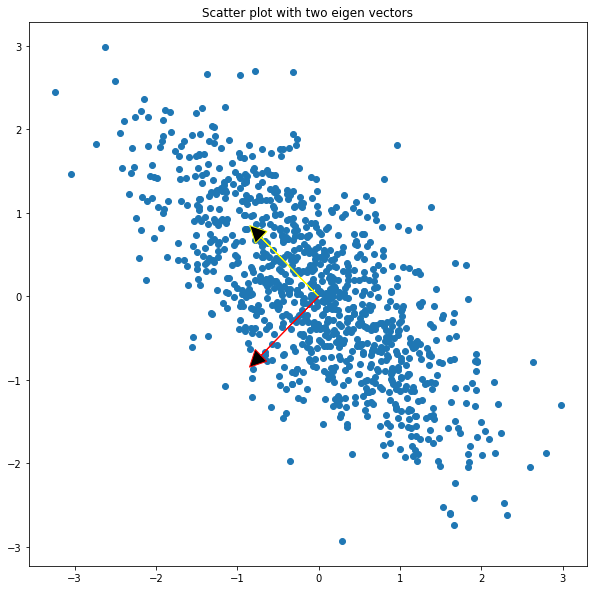

In [43]:
# Plotting the data points with the two eigen vectors

plt.figure(figsize = (10,10))
plt.scatter(X[0], X[1])
plt.arrow(0,0,W1[0],W1[1],head_width = 0.2, head_length = 0.2,fc = 'black', ec= 'yellow')
plt.arrow(0,0,W2[0],W2[1],head_width = 0.2, head_length = 0.2,fc = 'black', ec= 'red')
plt.title('Scatter plot with two eigen vectors')
plt.show()

#### The two eigen vectors can be seen orthonormal to each other